# Movember, moustaches, and ~~shaving~~ scraping!

<img src="https://media.giphy.com/media/4WO68upjIpDPO/giphy.gif" alt="Get real image from Shutterstock" align="right" width=500 height=500>

Movember is upon us and it's time to [support Men's health](https://us.movember.com/) by displaying a **glorious moustache**. To get inspiration, we're going to pay homage to the contestants of the 2017 World Beard and Moustache Championship, which was held in Austin, Texas USA from September 1-3, 2017. We'll do this by scraping data from the official website of the [Austin Facial Hair Club](https://www.austinfacialhairclub.com/), who hosted the event.

## Connecting and collecting

If you've never webscraped before, you should know webscraping can be _messy_. It requires you to dump all the `HTML` from a site and sift through it. And websites aren't designed with webscraping in mind, so you may have to jump around to get the information you need. Fortunately, there are packages to help! The `request` module from the [urllib](https://docs.python.org/3/library/urllib.html) package lets you connect to a webpage and grab its contents for you to work with locally. You can then use [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to help sort through all the `HTML` and extract only the items you want. In this project, we will only scrape a small amount from our chosen site, but out in the wild, you will likely need to scrape LOTS more to get the data you want.

In [1]:
# Import urlopen() and BeautifulSoup
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Assign the website url to an object and connect
url = "https://www.austinfacialhairclub.com/2017-wbmc-results"
html = urlopen(url)

# Use BeautifulSoup to scrape the HTML from th url
soup = BeautifulSoup(html, 'html.parser')

# Use the .prettify() method to print the soup object in a semi-readable way
pretty_soup = soup.prettify()
print(pretty_soup)

# Check out the class of the soup objects
print('soup is a {} object and pretty_soup is a {} object.' .format(type(soup).__name__, type(pretty_soup).__name__))

<!DOCTYPE doctype html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:website="http://ogp.me/ns/website">
 <head>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="initial-scale=1" name="viewport"/>
  <!-- This is Squarespace. -->
  <!-- afhc -->
  <base href=""/>
  <meta charset="utf-8">
   <title>
    Austin Facial Hair Club  — 2017 WBMC Results
   </title>
   <link href="https://static1.squarespace.com/static/54ef6bc4e4b0132962f60f94/t/590a8f8aa5790a517c906da6/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
   <link href="https://www.austinfacialhairclub.com/2017-wbmc-results" rel="canonical"/>
   <meta content="ZqL9rQQihiHV75CC_mH7nzrv9r1acr1hJ-Orh718c8s" name="google-site-verification">
    <meta content="Austin Facial Hair Club" property="og:site_name"/>
    <meta content="Austin Facial Hair Club  — 2017 WBMC Results" pr

## Inspecting `HTML` tags and exploring `BeautifulSoup`

While the formatting from the `.prettify()` method was _helpful_ (print `soup` on its own without the `.prettify()` method if you don't believe me - it's terrifying), it's still quite difficult to navigate through all this `HTML` to see what we actually need to scrape. To find out how to proceed, we need to look at the website itself. Using the inspect tool on the [2017 WBMC RESULTS](https://www.austinfacialhairclub.com/2017-wbmc-results) page will reveal the site's raw `HTML`  and will allow us to look through the `HTML` tags alongside the rendered website. If you don't know anything about `HTML`, don't worry, we'll get through this together. `HTML` tags indicate the type of information contained within that tag, for example `<a>` tags contain hyperlinks, `<img>` tags contain an image, `<div>` tags define a section, etc. To learn more about `HTML` and tags, [W3Schools](www.w3schools.com) provides great, succinct tutorials.

[![Inspect WBMC categories](https://assets.datacamp.com/production/repositories/3081/datasets/cd5a53082794a1b7c26e960c597b012a042248fe/YouTube still2.png)](https://www.youtube.com/watch?v=EAFprPJFNBM&feature=youtu.be "Inspect WBMC categories")

You can open the inspect tool using `Ctrl + Shift + i` on Windows machines or `Command + Option + i` on a Mac. You can also simply right click within a website and click on "Inspect". Clicking on the image above will send you to a YouTube video of the WBMC results page being inspecting. Something really helpful about using the inspect tool is that as you scroll over the raw `HTML`, the related sections of rendered images and text are highlighted. You can use this highlighting to find the tags you need quickly. Inspecting the WBMC results webpage reveals that all beard and moustache categories and their descriptions are located within `<p>` tags, which stands for paragraphs. `<p>` tags contin text elements. In the next step, we'll take this new knowledge of `HTML` and explore the various methods from `BeautifulSoup` that will ease our hairy journey into webscraping.

In [2]:
# Import pprint module and create a PrettyPrinter instance
import pprint
pp = pprint.PrettyPrinter()

# Explore Beautiful Soup
pp.pprint(soup.title)

#pp.pprint(soup.head)
#pp.pprint(soup.p)
#pp.pprint(soup.contents)
#pp.pprint(soup.get_text())


#Find all the paragraph tags within the HTML
categories = soup.find_all('p')

# Print out all paragraph tag contents and determine object type
pp.pprint(categories)
print('\nThe .find_all() method from Beautiful Soup returns {} objects.'.format(type(categories).__name__))

<title>Austin Facial Hair Club  — 2017 WBMC Results</title>
[<p>Natural Moustache</p>,
 <p>English Moustache</p>,
 <p>Dali Moustache</p>,
 <p>Imperial Moustache</p>,
 <p>Hungarian Moustache</p>,
 <p>Realistic Moustache</p>,
 <p>Creative Moustache</p>,
 <p>Realistic Beard</p>,
 <p>Creative Beard</p>,
 <p>Musketeer</p>,
 <p>Imperial Beard</p>,
 <p>Fu Manchu</p>,
 <p>Alaskan Whaler</p>,
 <p>Sideburns Natural</p>,
 <p>Natural Goatee</p>,
 <p>Verdi</p>,
 <p>Garibaldi</p>,
 <p>Full Beard with Styled Moustache</p>,
 <p>Full Beard 0.1-15cm</p>,
 <p>Full Beard 15.1-30cm</p>,
 <p>Full Beard 30.1-45cm</p>,
 <p>Full Beard 45.1-60+cm</p>,
 <p>Freestyle Moustache</p>,
 <p>Cheekbeard (Backenbart) Freestyle</p>,
 <p>Sideburns Freestyle</p>,
 <p>Partial Beard Freestyle</p>,
 <p>Full Beard Freestyle</p>,
 <p style="white-space: pre-wrap;">1514 Ed Bluestein Blvd Suite 107<br/>Austin, TX 78721<br/>email: <a href="mail to: info@austinfacialhairclub.com">info@austinfacialhairclub.com</a></p>,
 <p>Thank you 

## Time to clean up!

<img src="https://media.giphy.com/media/5t1YusAYxmRn474Sid/giphy.gif" alt="Get real image from Shutterstock" align="left" style="margin: 0px 20px" height="200" width="300">
We've actually managed to get pretty far already. You now know that all the categories that competed at the last World Beard and Moustache Championships live in paragraph tags, that there are a few more paragraph tags than you need, and that using `BeautifulSoup` returns a weird object called a `ResultSet`. So, we need to do two things: convert the `ResultSet` object to something we can work with and remove the last two tags, which contain contact information and a polite "Thank you for signing up!"

In [3]:
# Create a blank list object and grab the text from within the paragraph tags
all_categories = []

for category in categories:
    all_categories.append(category.get_text("p"))

# Remove contact info from list
all_categories = all_categories[:-2]

# Pretty print all_categories
pp.pprint(all_categories)

# Determine object type and length
print('\nall_categories is a {} object with {} items.'.format(type(all_categories).__name__, len(all_categories)))

['Natural Moustache',
 'English Moustache',
 'Dali Moustache',
 'Imperial Moustache',
 'Hungarian Moustache',
 'Realistic Moustache',
 'Creative Moustache',
 'Realistic Beard',
 'Creative Beard',
 'Musketeer',
 'Imperial Beard',
 'Fu Manchu',
 'Alaskan Whaler',
 'Sideburns Natural',
 'Natural Goatee',
 'Verdi',
 'Garibaldi',
 'Full Beard with Styled Moustache',
 'Full Beard 0.1-15cm',
 'Full Beard 15.1-30cm',
 'Full Beard 30.1-45cm',
 'Full Beard 45.1-60+cm',
 'Freestyle Moustache',
 'Cheekbeard (Backenbart) Freestyle',
 'Sideburns Freestyle',
 'Partial Beard Freestyle',
 'Full Beard Freestyle']

all_categories is a list object with 27 items.


## Moustaches only

<img src="https://media.giphy.com/media/kNzFwWMFkGufm/giphy.gif" alt="Get real image from Shutterstock" align="right" style="margin: 0px 20px" height="180" width="250">
At this point you can see that there are several moustache categories, but even more beard categories. Let's filter out the beards so you can focus on your upper lip decor. We are going to use some simple regex to do this. You may already be familiar with the [re](https://docs.python.org/3/library/re.html) module, which we'll be using here. If not, this is going to be a _very_ gentle introduction as we will only be using the `compile()` and `search()` functions, which respectively create the regex pattern and search the string for that pattern. 

In [4]:
# Import the regular expression module (re) from the Python Standard Library
import re

# Use regex to find the word "Moustache" anywhere in the string
regex = re.compile('.*Moustache$')

# Use a list comprehension to create moustache_list that includes only the moustache categories
moustache_list = [x.group(0) for l in all_categories for x in [regex.search(l)] if x]

# Print out the new moustache only list
pp.pprint(moustache_list)

['Natural Moustache',
 'English Moustache',
 'Dali Moustache',
 'Imperial Moustache',
 'Hungarian Moustache',
 'Realistic Moustache',
 'Creative Moustache',
 'Full Beard with Styled Moustache',
 'Freestyle Moustache']


## Diving a bit deeper

<img src="https://media.giphy.com/media/1AeOHcbfNPOPndooYW/giphy.gif" alt="Get real image from Shutterstock" align="right" style="margin: 0px 20px" height="180" width="200">
Now that you have our list together, you're realizing you have __no__ idea what these moustache categories actually mean. This website is set up with the pictures of the winners (1st - 3rd) displayed and the rest of the contestants in a table. We want to make sure we include the winners' data in our table, but it's a bit trickier than our previous attempts at webscraping. This time, the data is spread out across `<h2>` and `<h3>` tags and the information is nested between some formatting tags that could cause some problems.

In [5]:
# Assign the website url to an object and connect
url = "https://www.worldbeardchampionships.com/categories/"
html = urlopen(url)

soup = BeautifulSoup(html, 'html.parser')
soup = soup.body

In [6]:
#Find all the paragraph tags within the HTML
descriptions = soup.find_all('p')

In [7]:
all_descriptions = []

for description in descriptions:
    all_descriptions.append(soup.get_text())

GET A TOO MANY REQUESTS ERROR WITH THE FOLLOWING

In [8]:
sites = []
new_url = url.replace("2017-wbmc-results", "")

for x in moustache_list:
    test_String = x.replace(" ", "-")
    test = new_url+'results-'+test_String
    sites.append(test.lower())
    print(test.lower())

https://www.worldbeardchampionships.com/categories/results-natural-moustache
https://www.worldbeardchampionships.com/categories/results-english-moustache
https://www.worldbeardchampionships.com/categories/results-dali-moustache
https://www.worldbeardchampionships.com/categories/results-imperial-moustache
https://www.worldbeardchampionships.com/categories/results-hungarian-moustache
https://www.worldbeardchampionships.com/categories/results-realistic-moustache
https://www.worldbeardchampionships.com/categories/results-creative-moustache
https://www.worldbeardchampionships.com/categories/results-full-beard-with-styled-moustache
https://www.worldbeardchampionships.com/categories/results-freestyle-moustache


In [10]:
categories = {'Natural Moustache': "Moustache as it grows and left natural. The more natural the better. No closed curls. All hair growing from more than 1.5 cm past the corner of the mouth must be shaved. The moustache may be maintained but without styling aids.", 
              'Dali Moustache': "Slender with the tips curled upward. Hairs growing from beyond the corner of the mouth must be shaved. The tips may not extend above the level of the eyebrows. Styling aids* permitted.", 
              'English Moustache':"Slender. The hairs extend outward from the middle of the upper lip. The tips may be slightly raised. Hairs growing from beyond the corner of the mouth must be shaved. Styling aids* permitted.", 
              'Imperial Moustache': "Small and bushy with the tips curled upward. Hairs growing from beyond the corner of the mouth must be shaved. Styling aids* permitted.",
              'Hungarian Moustach': "Big and bushy. The hair extends outward from the middle of the upper lip. All hair growing from more than 1.5 cm past the past the corner of the mouth must be shaved. Styling aids* permitted.",
              'Freestyle Moustache':"Free design and styling of the moustache. All moustaches not meeting the criteria for other categories may compete in this category. All hair growing from more than 1.5 cm past the corner of the mouth must be shaved. Styling aids* permitted.",
              'Goatee Natural': "The goatee appears as it grows naturally. The more natural the better! The goatee and moustache may be maintained but without any styling aids.* The moustache may not be curled. An area at least 4 cm wide (the width of a razor blade) between the temple and the goatee must be clean shaven. No styling aids* permitted.", 
              'Musketeer': "The beard is narrow and pointed. The moustache is slender, long, and drawn out in a slight bow. The moustache may not include hairs growing from more than 1.5 cm past the corners of the mouth. Styling aids* permitted.",
              'Fu Manchu': "All areas more than 2cm past the corner of the mouth must be clean shaven, as must all areas under the chin. The tips of the moustache extend downward. The Genghis Khan moustache style is also acceptable. Styling aids* permitted.",
              'Goatee Freestyle': "Free design and styling of all partial beards that are not goatees. Such partial beards not meeting the criteria for other categories may compete in this category. An area at least 4 cm wide (the width of a razor blade) between the temple and the goatee must be clean shaven. Areas at least 4 cm wide (the width of a razor blade) on the chin and between the temple and the goatee must be clean shaven. The Sideburns category was introduced for the Carson City worlds in 2003 to honor the King, Elvis Presley. The category has remained controversial since its inception. The Association of German Beard Clubs translates the name of this category into English as “Whiskers ‘Freestyle’ & ‘Sideburns’,” but the German description excludes sideburns, a term not used in German and a facial hair style not common in Germany.",
              'Imperial Partial Beard/Kaiser Beard': "Hair on the cheeks and upper lip. There must be clean shaven spaces of at least 4 cm wide (the width of a razor blade) on the chin and between the facial hair and the onset of the head hair. The whiskers are styled upwards. No closed curls. The hairs on the upper lip may not be separated from the hairs on the cheeks. The hairs may not be too long, not above the level of the eyes. Styling aids* are allowed.",
              'Partial Beard Freestyle and Sideburns': "Free design and styling of the goatee. All goatees not meeting the criteria for other categories may compete in this category. An area at least 4 cm wide (the width of a razor blade) between the temple and the goatee must be clean shaven. Styling aids* permitted.",
              'Full Beard Natural': "The beard appears as it grows naturally. The more natural the better! The moustache may not be highlighted. The beard may not be curled under at the bottom! No styling aids* permitted.",
              'Full Beard Styled Moustache': "The moustache is distinct from the beard but may not include hair growing from more than 1.5 cm past the corner of the mouth. The moustache may be styled as in the Dali, English, Hungarian, and Imperial moustache categories. The beard appears as it grows and left natural. The more natural the better! Styling aids* are permitted on the moustache. No styling aids*are permitted on the beard.",
              'Verdi': "Full beard, short and rounded at bottom, no more than 10 cm in length as measured from the bottom of the lower lip. The moustache is distinct from the beard but may not include hair growing from more than 1.5 cm past the corner of the mouth. Styling aids* permitted.",
              'Garibaldi': "The beard is wide and rounded at the bottom, and no more than 20 cm in length as measured from the bottom of the lower lip. The beard appears as it grows naturally. The more natural the better. The moustache may not be made distinct from the beard or styled. The beard may not be curled under at the bottom. No styling aids* permitted.", 
              'Full Beard Freestyle': "Free design and styling of the beard. All full beards not meeting the criteria for other categories may compete in this category. Styling aids* permitted."}

In [9]:
import time


# Loop through all the sites to pull out moustache category descriptions
category_descriptions = []

for site in sites:
    html = urlopen(site)
    soup = BeautifulSoup(html, 'html.parser')
    category_descriptions.append(soup.h3.get_text('h3').replace('h3', ' ').replace('\xa0',' '))
    time.sleep(300)

# Zip together the list of moustache categories and their descriptions
stache_dict = dict(zip(moustache_list, category_descriptions))
pp.pprint(stache_dict)

HTTPError: HTTP Error 404: Not Found

## Clean things up...again

Reading through our stache dictionary, we realize that it looks _mostly_ okay, but there are a few problems. There are a few random `h3` tags within our text, but the biggest problem is the description for "Hungarian Moustache" is in fact, not there at all; instead a rank and a contestant number are available.

https://www.austinfacialhairclub.com/results-natural-moustache

In [11]:
html = urlopen(sites[4])
soup = BeautifulSoup(html, 'html.parser')
descriptions = (soup.p.getText('p'))
print(descriptions)

stache_dict['Hungarian Moustache'] = descriptions
pp.pprint(stache_dict)

HTTPError: HTTP Error 404: Not Found

## Bring it all together in a function

<img src="https://media.giphy.com/media/Yjb1jDhMWswRG/giphy.gif" alt="Get real image from Shutterstock" align="left" style="margin: 0px 20px" height="300" width="400">
Since you want your Movemember Moustache to be epic, you'll want to look through the winningest moustaches from the last world championship. Given that Movemenber is a month for awareness, you also want to give your friends the opportunity to participate. All your friends are `pip` savvy, so you've decided to wrap all this information into a very simple package to distribute on [PyPI](https://pypi.org/). Before all that though, you want to create a simple test function that you will use to choose your moustache by viewing each moustache and its description. The goal is for the function to print out descriptive information and then record your choice to generate the appropriate url to send you to in your next step.

In [ ]:
# # Print out each moustache along with its index to make the next step easier
# for num, moustache_type in enumerate(moustache_list):
#     print('{} {}'.format(num, moustache_type))

# num = 0
# for key, value in stache_dict.iteritems():
#     print('{}{}{}'.format(num, key, value))
#     num += 1
# num = 0
# for key, value in stache_dict.items():
#     print('{} {}: {}'.format(num, key, value))
#     num += 1

# Create a custom function that generates a correctly formatted url
def choose_moustache(path=0):
    """Doc String"""
    new_url = url.replace("2017-wbmc-results", "")
    # Print out each moustache along with its index to make the next step easier
    for num, moustache_type in enumerate(moustache_list):
        print('{} {}'.format(num, moustache_type))
    path = int(input('\nChoose the index of your preferred moustache:'))
    test_String = moustache_list[path].replace(" ", "-")
    test = new_url+'results-'+test_String
    site = test.lower()
    print('\nI want a {}!'.format(moustache_list[path]))
    return site

In [ ]:
# Call the choose_moustache() function with any path 0-8
my_moustache = choose_moustache()

## The unveiling

Now it's finally time to check out those sweet sweet whiskers you've been dreaming of. We could do this with the `webbrowswer` module, which will open up a new tab. However, we want to stay in our notebook, so we'll use the `IPython` module to create an IFrame to view the webpage as output. Specifically, we'll be using the `.HTML()` method from the `display` module from `IPython`. First we'll need to whip up an IFrame, which stands for "inline frame." IFrames let you embed a website _within_ another website.

In [ ]:
# Import the IPython module
import IPython

# Create the IFrame for viewing the website within the Jupyter Notebook
iframe = '<iframe src=' + my_moustache + ' width=1000 height=350></iframe>'

# Display the IFrame
IPython.display.HTML(iframe)

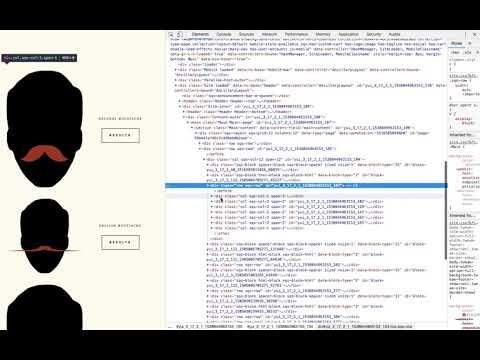

In [27]:
from IPython.display import YouTubeVideo

def display_yotube_video(url, **kwargs):
    """
    Displays a Youtube video in a Jupyter notebook.
    
    Args:
        url (string): a link to a Youtube video.
        **kwargs: further arguments for IPython.display.YouTubeVideo
    
    Returns:
        YouTubeVideo: a video that is displayed in your notebook.
    """
    id_ = url.split("=")[-1]
    return YouTubeVideo(id_, **kwargs)

display_yotube_video("https://www.youtube.com/watch?v=EAFprPJFNBM", width=800, height=600)

Wow! Just look at those glorious moustaches! If you can't grow a moustache yourself, make sure to check out the "Realistic" and "Creative" moustache categories.

The next World Moustache and Beard Championship will be held in Antwerp, Belgium from May 17-19, 2019.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Belgium.svg/450px-Flag_of_Belgium.svg.png" alt="Get real image from Shutterstock" width=250 height=250>